<a href="https://colab.research.google.com/github/JhoelHairton/Aplicativo-Demo/blob/main/Modelos_cluzterizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [ ]:
# Cargar dataset desde archivos subidos a Colab
from google.colab import files
import io

print("Por favor, sube el archivo Mall_Customers.csv")
uploaded = files.upload()

# Leer el archivo subido
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\n✓ Archivo cargado exitosamente")

Por favor, sube el archivo Mall_Customers.csv


Saving Mall_Customers.csv to Mall_Customers (1).csv

✓ Archivo cargado exitosamente


In [ ]:
print("="*50)
print("EXPLORACIÓN DEL DATASET")
print("="*50)
print("\nPrimeras filas:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

EXPLORACIÓN DEL DATASET

Primeras filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dimensiones: (200, 5)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4)

Datos seleccionados: 200 clientes, 2 variables


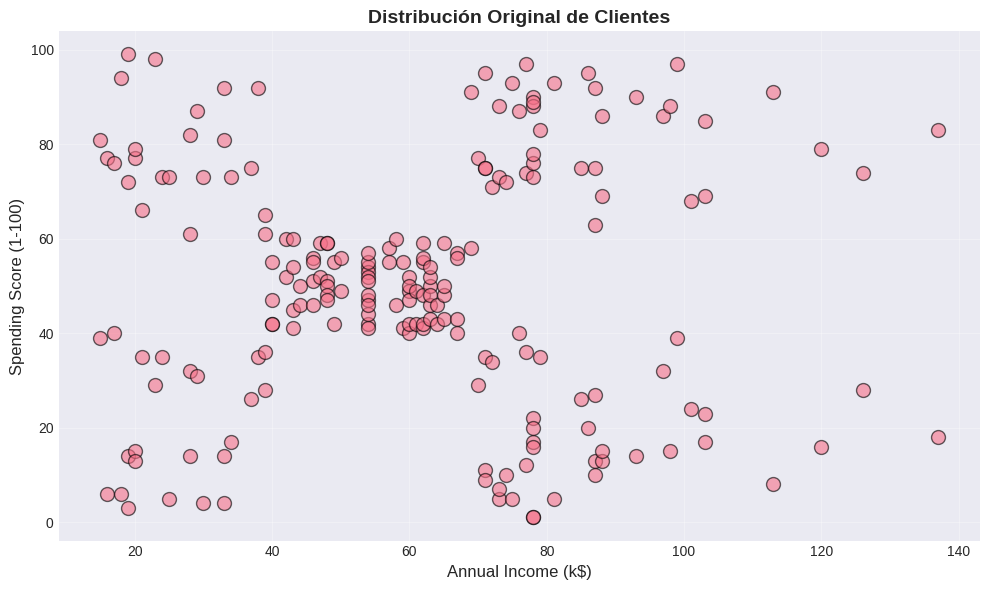

In [ ]:
# Seleccionar variables relevantes para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(f"Datos seleccionados: {X.shape[0]} clientes, {X.shape[1]} variables")

# Visualización inicial de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=100, edgecolors='k')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Distribución Original de Clientes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✓ Datos normalizados con StandardScaler")

✓ Datos normalizados con StandardScaler


MÉTODO 1: HAC - COMPLETE LINKAGE
✓ Linkage calculado con método 'complete'


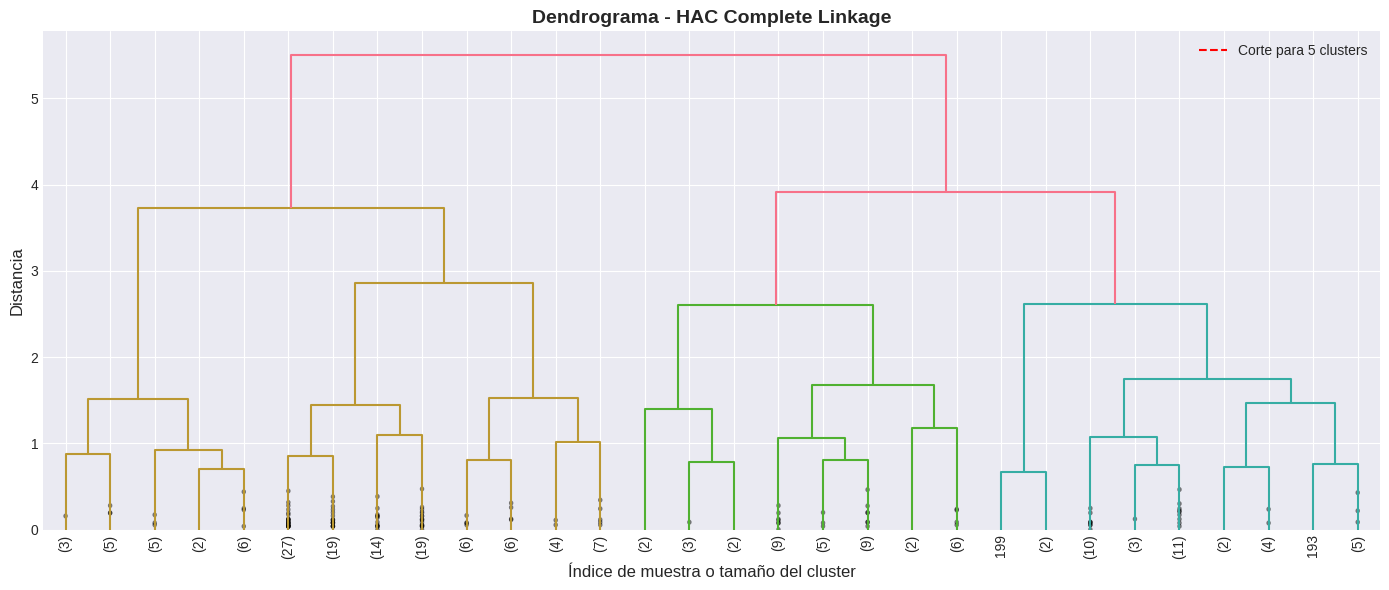

In [ ]:
print("="*50)
print("MÉTODO 1: HAC - COMPLETE LINKAGE")
print("="*50)

# Calcular linkage con método complete
Z_complete = linkage(X_scaled, method='complete', metric='euclidean')
print("✓ Linkage calculado con método 'complete'")

# Dendrograma
plt.figure(figsize=(14, 6))
dendrogram(Z_complete,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Dendrograma - HAC Complete Linkage', fontsize=14, fontweight='bold')
plt.xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', label='Corte para 5 clusters')
plt.legend()
plt.tight_layout()
plt.show()

✓ 5 clusters extraídos


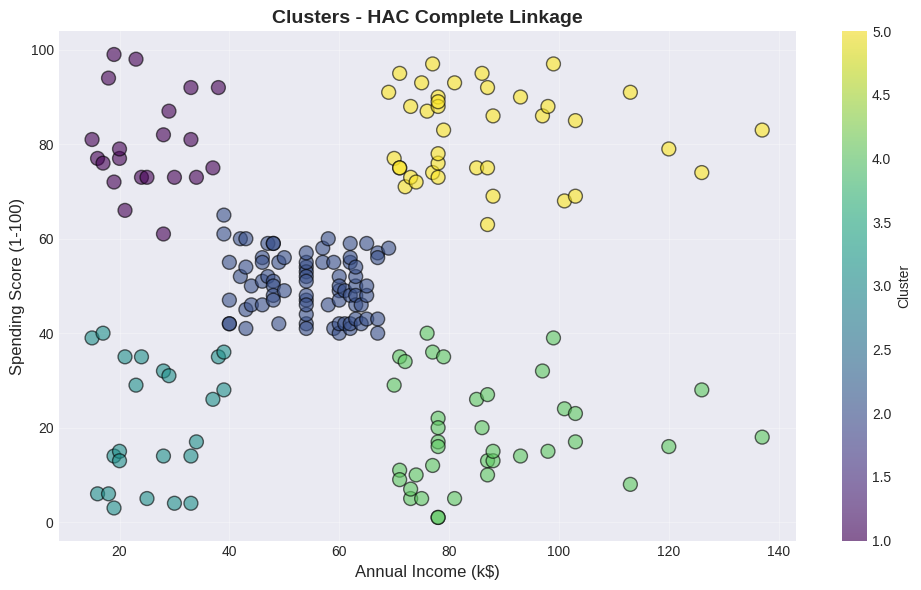

Silhouette Score: 0.553


In [ ]:
# Extraer 5 clusters
clusters_complete = fcluster(Z_complete, t=5, criterion='maxclust')
print(f"✓ {len(np.unique(clusters_complete))} clusters extraídos")

# Visualización de clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=clusters_complete,
                     cmap='viridis',
                     s=100,
                     alpha=0.6,
                     edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Clusters - HAC Complete Linkage', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métrica de evaluación
silhouette_complete = silhouette_score(X_scaled, clusters_complete)
print(f"Silhouette Score: {silhouette_complete:.3f}")

MÉTODO 2: WARD (Varianza Mínima)
✓ Linkage calculado con método 'ward'


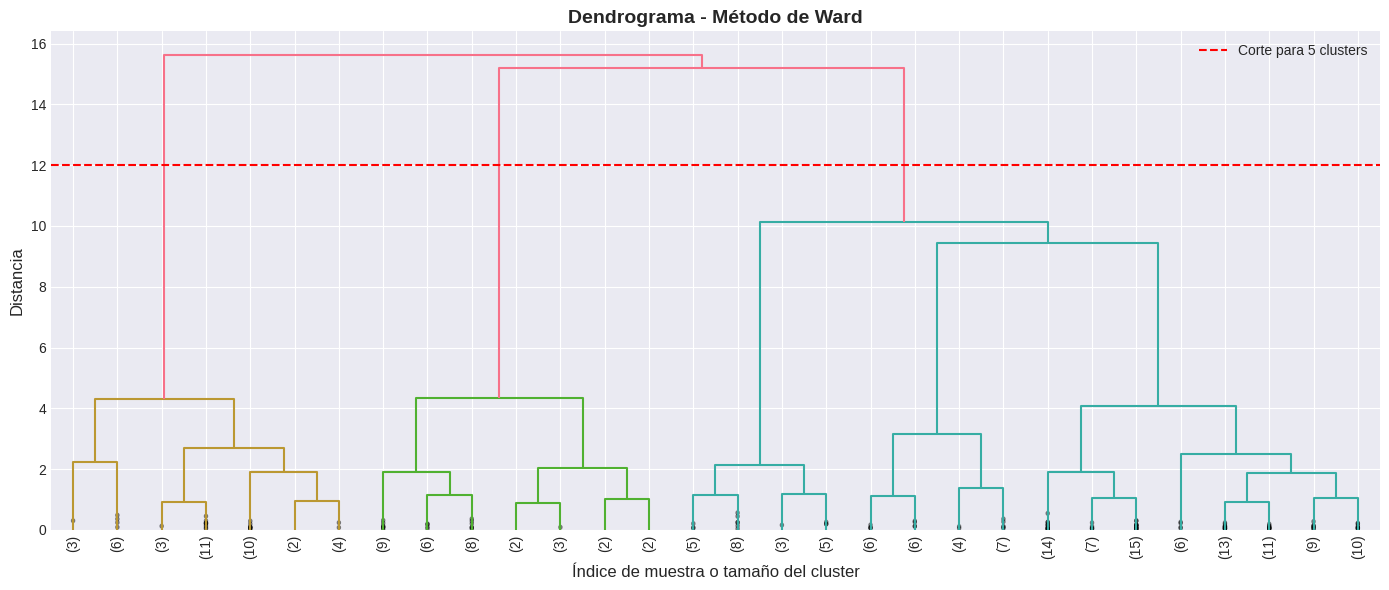

In [ ]:
print("="*50)
print("MÉTODO 2: WARD (Varianza Mínima)")
print("="*50)

# Calcular linkage con método ward
Z_ward = linkage(X_scaled, method='ward')
print("✓ Linkage calculado con método 'ward'")

# Dendrograma
plt.figure(figsize=(14, 6))
dendrogram(Z_ward,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Dendrograma - Método de Ward', fontsize=14, fontweight='bold')
plt.xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=12, color='r', linestyle='--', label='Corte para 5 clusters')
plt.legend()
plt.tight_layout()
plt.show()

✓ 5 clusters extraídos


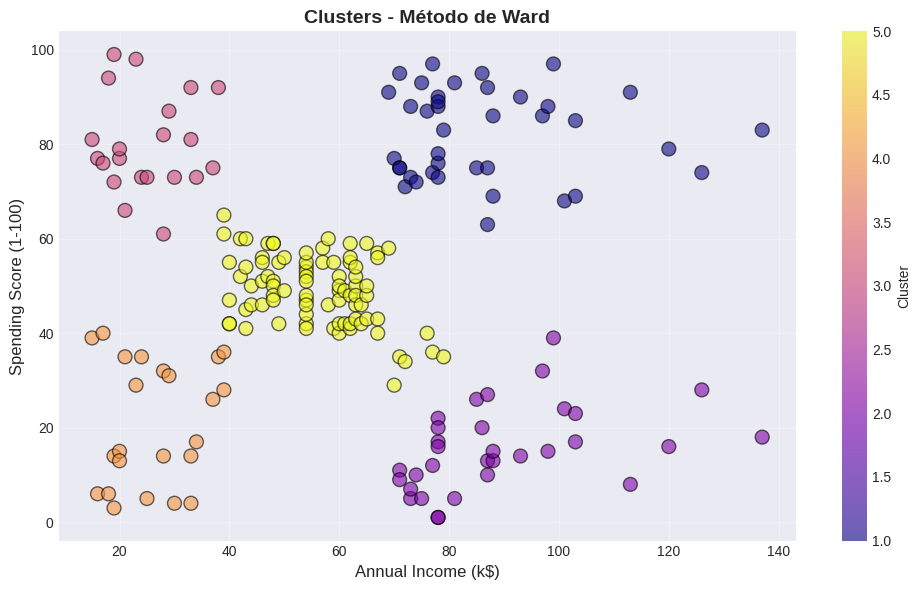

Silhouette Score: 0.554


In [ ]:
# Extraer 5 clusters
clusters_ward = fcluster(Z_ward, t=5, criterion='maxclust')
print(f"✓ {len(np.unique(clusters_ward))} clusters extraídos")

# Visualización de clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=clusters_ward,
                     cmap='plasma',
                     s=100,
                     alpha=0.6,
                     edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Clusters - Método de Ward', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métrica de evaluación
silhouette_ward = silhouette_score(X_scaled, clusters_ward)
print(f"Silhouette Score: {silhouette_ward:.3f}")

In [ ]:
print("="*50)
print("MÉTODO 3: DIANA (Divisive Analysis)")
print("="*50)

# Implementación simplificada de DIANA (aproximación)
def diana_clustering(X, n_clusters=5):
    """
    Implementación simplificada de DIANA (DIvisive ANAlysis)
    Enfoque top-down: comienza con todos los puntos en un cluster
    y los divide recursivamente.
    """
    from sklearn.cluster import KMeans

    # Comenzar con todos los puntos en un cluster
    clusters = np.zeros(len(X), dtype=int)
    linkage_matrix = []
    current_cluster_id = 0
    next_cluster_id = 1

    # Realizar divisiones hasta tener n_clusters
    for _ in range(n_clusters - 1):
        # Encontrar el cluster más grande para dividir
        unique, counts = np.unique(clusters, return_counts=True)
        if len(unique) == 0:
            break
        largest_cluster_id = unique[np.argmax(counts)]

        # Obtener puntos del cluster más grande
        mask = clusters == largest_cluster_id
        points_in_cluster = X[mask]

        if len(points_in_cluster) < 2:
            break

        # Dividir usando K-Means con k=2
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        sub_clusters = kmeans.fit_predict(points_in_cluster)

        # Actualizar asignaciones
        new_clusters = clusters.copy()
        indices = np.where(mask)[0]
        new_clusters[indices[sub_clusters == 1]] = next_cluster_id

        # Calcular distancia para el linkage
        dist = np.linalg.norm(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])

        # Agregar a matriz de linkage [cluster1, cluster2, distancia, tamaño]
        linkage_matrix.append([
            largest_cluster_id,
            next_cluster_id,
            dist,
            len(points_in_cluster)
        ])

        clusters = new_clusters
        next_cluster_id += 1

    return clusters, np.array(linkage_matrix)

# Aplicar DIANA
clusters_diana, Z_diana = diana_clustering(X_scaled, n_clusters=5)
print("✓ DIANA aplicado (implementación aproximada)")

MÉTODO 3: DIANA (Divisive Analysis)
✓ DIANA aplicado (implementación aproximada)


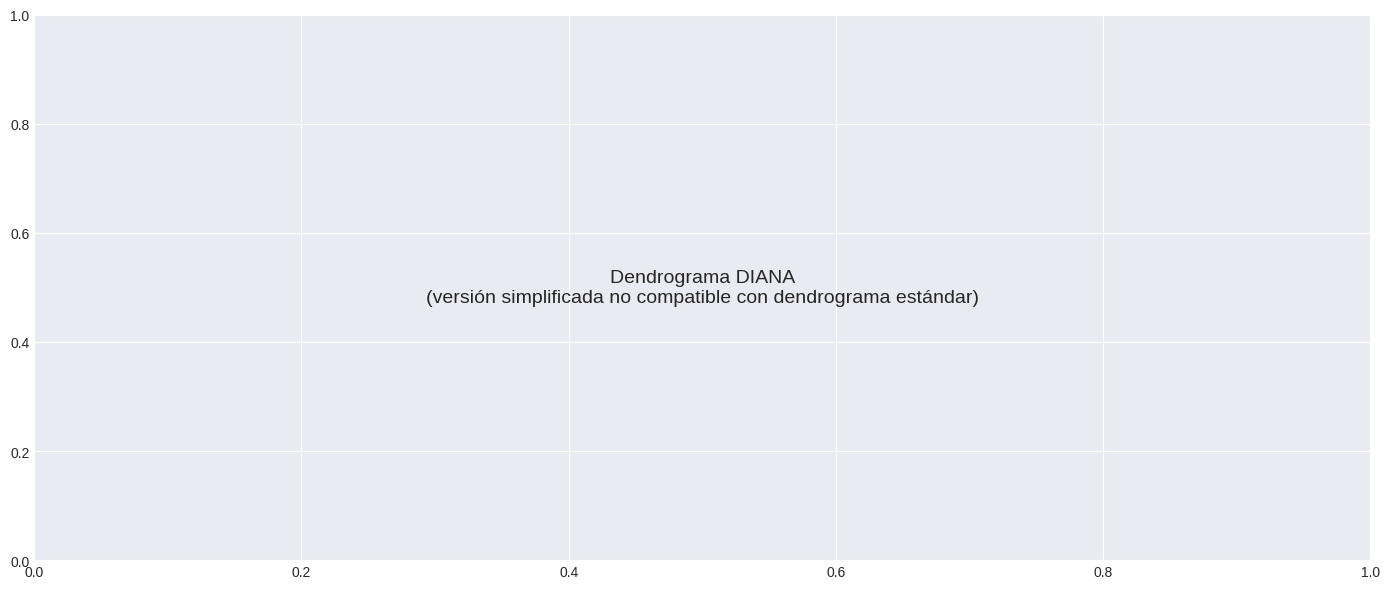

In [ ]:
# Dendrograma (simplificado)
plt.figure(figsize=(14, 6))
# La implementación simple de DIANA no genera una matriz de linkage
# en el formato esperado por scipy.cluster.hierarchy.dendrogram,
# por lo que se omite el dendrograma estándar para DIANA.
plt.text(0.5, 0.5, 'Dendrograma DIANA\n(versión simplificada no compatible con dendrograma estándar)',
         ha='center', va='center', fontsize=14)
plt.tight_layout()
plt.show()

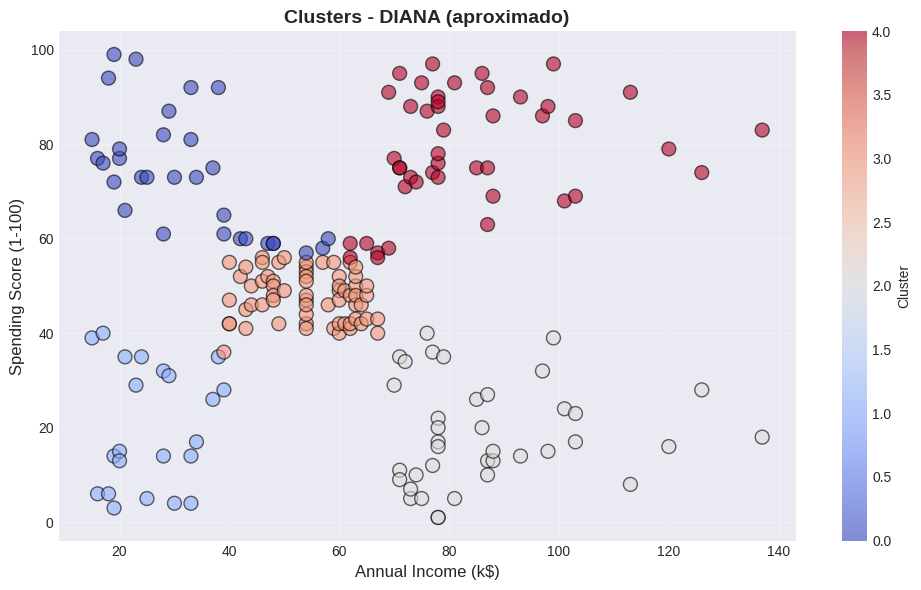

Silhouette Score (DIANA): 0.461


In [ ]:
# Visualización de clusters DIANA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=clusters_diana,
                     cmap='coolwarm', # Usar un mapa de color diferente para distinguirlo
                     s=100,
                     alpha=0.6,
                     edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Clusters - DIANA (aproximado)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métrica de evaluación para DIANA
# Asegurarse de que hay al menos 2 clusters para calcular el Silhouette Score
if len(np.unique(clusters_diana)) > 1:
    silhouette_diana = silhouette_score(X_scaled, clusters_diana)
    print(f"Silhouette Score (DIANA): {silhouette_diana:.3f}")
else:
    print("No se pudieron formar suficientes clusters con DIANA para calcular el Silhouette Score.")

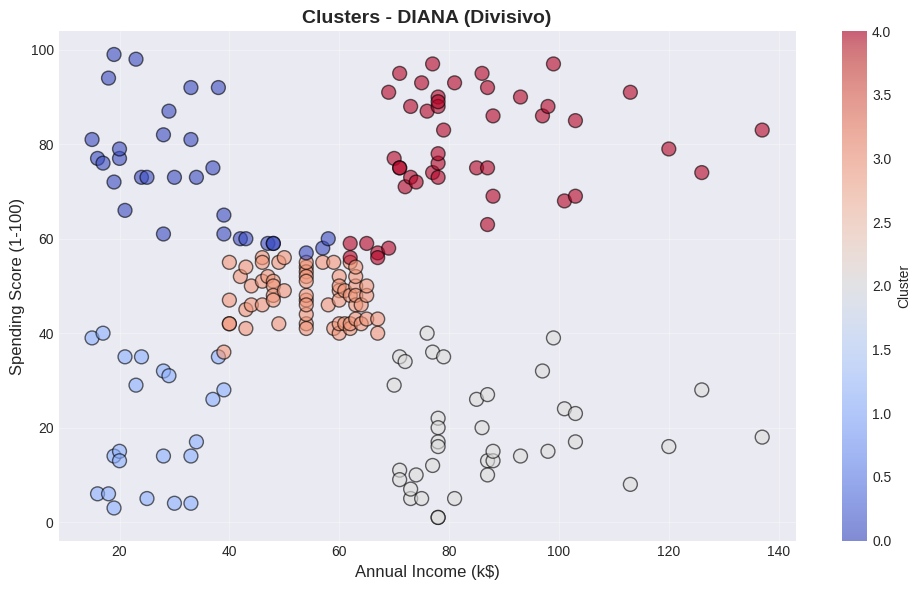

Silhouette Score: 0.461


In [ ]:
# Visualización de clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=clusters_diana,
                     cmap='coolwarm',
                     s=100,
                     alpha=0.6,
                     edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Clusters - DIANA (Divisivo)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métrica de evaluación
silhouette_diana = silhouette_score(X_scaled, clusters_diana)
print(f"Silhouette Score: {silhouette_diana:.3f}")

### Resumen y Conclusiones

In [ ]:
print("="*50)
print("RESUMEN DE RESULTADOS")
print("="*50)

print(f"Silhouette Score - Complete Linkage: {silhouette_complete:.3f}")
print(f"Silhouette Score - Método de Ward:    {silhouette_ward:.3f}")
print(f"Silhouette Score - DIANA (aproximado): {silhouette_diana:.3f}")

print("\nBasado en los Silhouette Scores, el Método de Ward y Complete Linkage obtuvieron puntuaciones similares y ligeramente superiores a la aproximación de DIANA.")
print("Visualmente, el Método de Ward parece generar clusters más compactos y bien separados para este conjunto de datos.")

RESUMEN DE RESULTADOS
Silhouette Score - Complete Linkage: 0.553
Silhouette Score - Método de Ward:    0.554
Silhouette Score - DIANA (aproximado): 0.461

Basado en los Silhouette Scores, el Método de Ward y Complete Linkage obtuvieron puntuaciones similares y ligeramente superiores a la aproximación de DIANA.
Visualmente, el Método de Ward parece generar clusters más compactos y bien separados para este conjunto de datos.


### Comparación Visual

COMPARACIÓN VISUAL


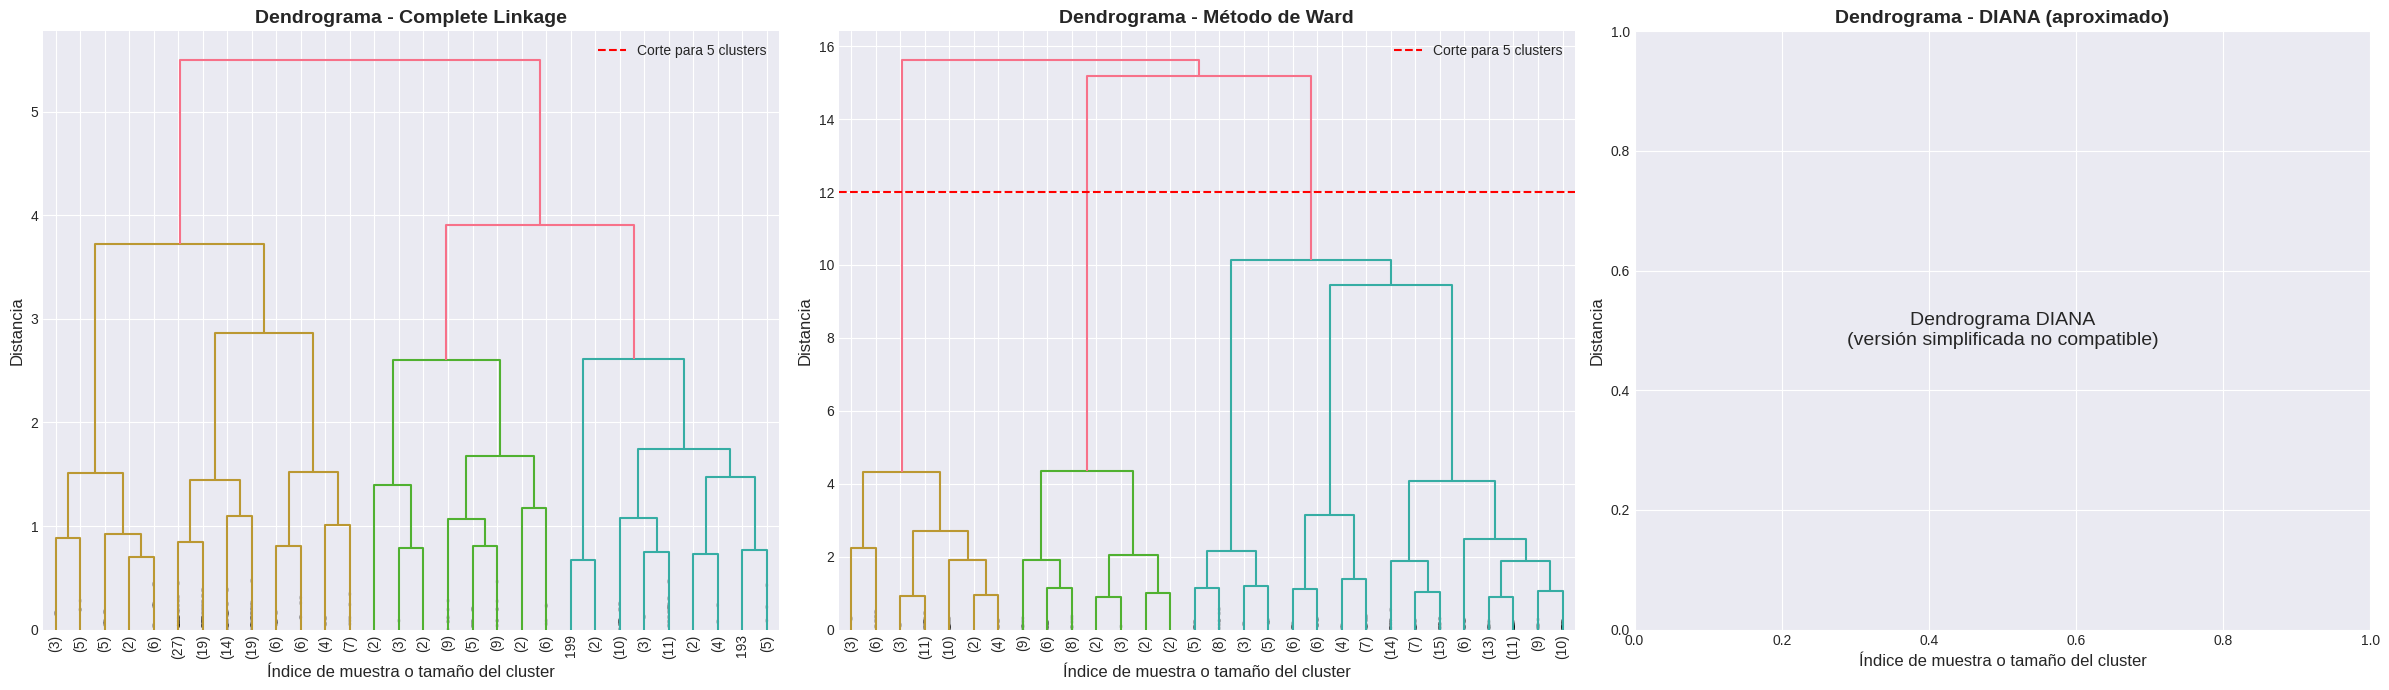

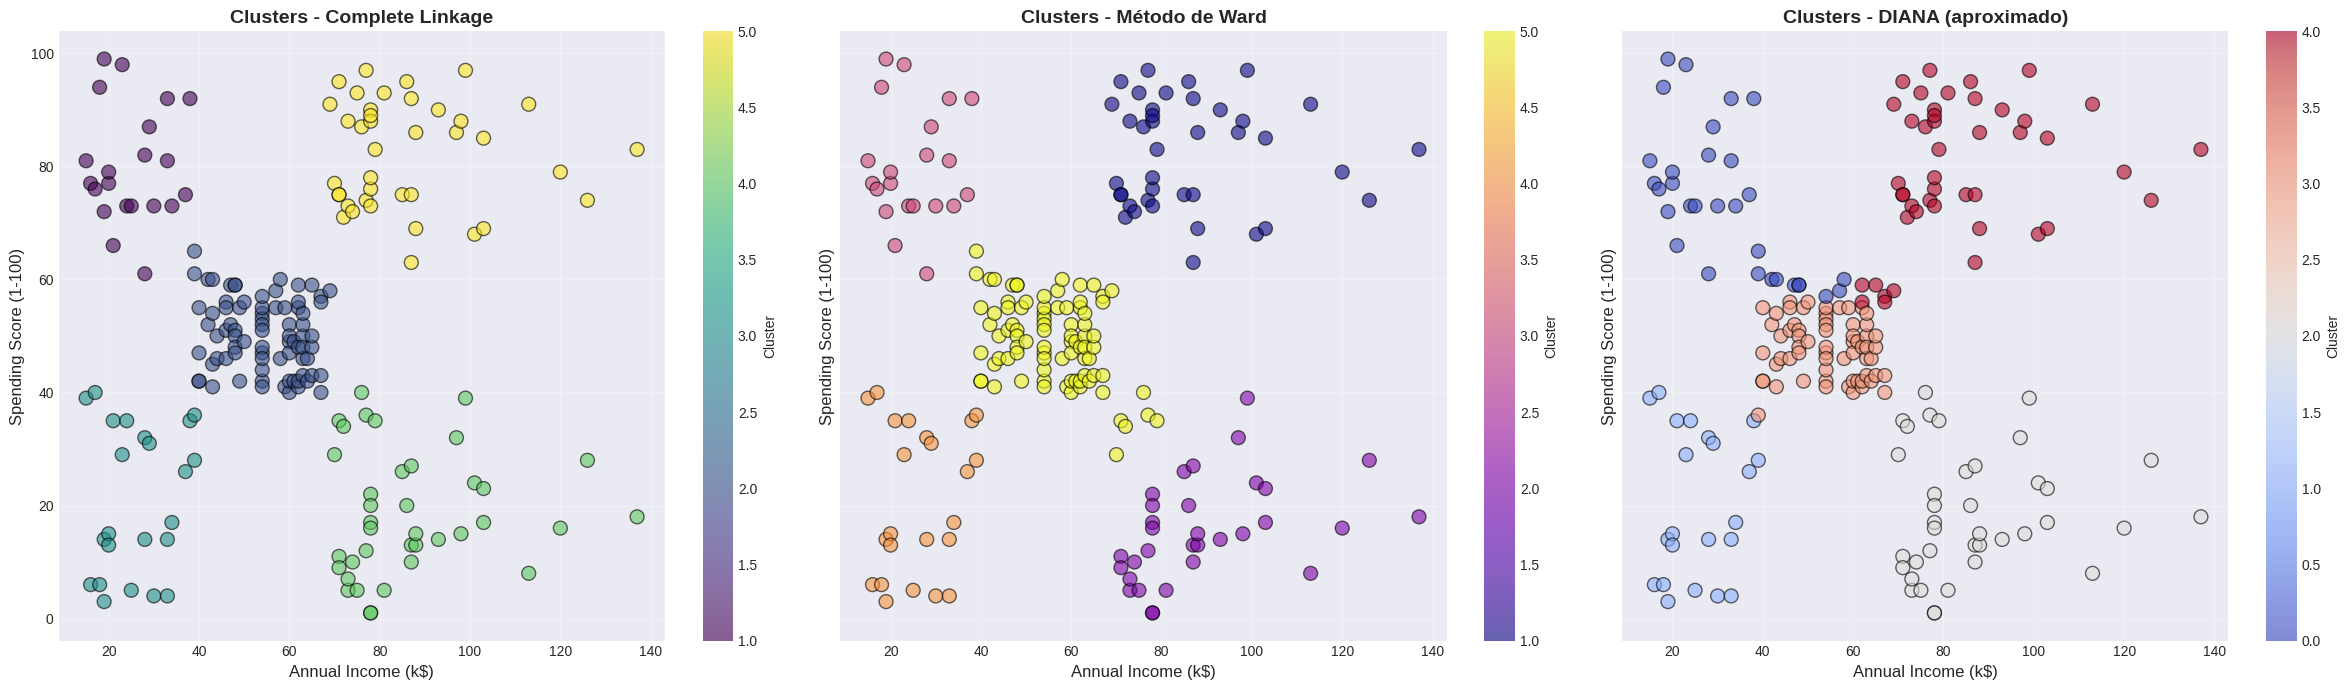

In [ ]:
print("="*50)
print("COMPARACIÓN VISUAL")
print("="*50)

# Subplot para dendrogramas
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=False)

# Dendrograma Complete Linkage
dendrogram(Z_complete,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True,
           ax=axes[0])
axes[0].set_title('Dendrograma - Complete Linkage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
axes[0].set_ylabel('Distancia', fontsize=12)
axes[0].axhline(y=6, color='r', linestyle='--', label='Corte para 5 clusters')
axes[0].legend()

# Dendrograma Ward
dendrogram(Z_ward,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True,
           ax=axes[1])
axes[1].set_title('Dendrograma - Método de Ward', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
axes[1].set_ylabel('Distancia', fontsize=12)
axes[1].axhline(y=12, color='r', linestyle='--', label='Corte para 5 clusters')
axes[1].legend()

# Dendrograma DIANA (Placeholder ya que no es compatible con scipy.cluster.hierarchy.dendrogram)
axes[2].text(0.5, 0.5, 'Dendrograma DIANA\n(versión simplificada no compatible)',
             ha='center', va='center', fontsize=14)
axes[2].set_title('Dendrograma - DIANA (aproximado)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
axes[2].set_ylabel('Distancia', fontsize=12)


plt.tight_layout()
plt.show()

# Subplot para scatter plots de clusters
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=True, sharex=True)

# Clusters Complete Linkage
scatter_complete = axes[0].scatter(X[:, 0], X[:, 1],
                                   c=clusters_complete,
                                   cmap='viridis',
                                   s=100,
                                   alpha=0.6,
                                   edgecolors='k')
fig.colorbar(scatter_complete, ax=axes[0], label='Cluster')
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0].set_title('Clusters - Complete Linkage', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Clusters Ward
scatter_ward = axes[1].scatter(X[:, 0], X[:, 1],
                               c=clusters_ward,
                               cmap='plasma',
                               s=100,
                               alpha=0.6,
                               edgecolors='k')
fig.colorbar(scatter_ward, ax=axes[1], label='Cluster')
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[1].set_title('Clusters - Método de Ward', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Clusters DIANA
scatter_diana = axes[2].scatter(X[:, 0], X[:, 1],
                                c=clusters_diana,
                                cmap='coolwarm',
                                s=100,
                                alpha=0.6,
                                edgecolors='k')
fig.colorbar(scatter_diana, ax=axes[2], label='Cluster')
axes[2].set_xlabel('Annual Income (k$)', fontsize=12)
axes[2].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[2].set_title('Clusters - DIANA (aproximado)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Resumen de métricas
print("="*50)
print("RESUMEN DE MÉTRICAS")
print("="*50)
print(f"HAC Complete Linkage - Silhouette Score: {silhouette_complete:.3f}")
print(f"Método de Ward       - Silhouette Score: {silhouette_ward:.3f}")
print(f"DIANA (Divisivo)     - Silhouette Score: {silhouette_diana:.3f}")
print("\n✓ Mejor método según Silhouette Score:",
      ["Complete Linkage", "Ward", "DIANA"][np.argmax([silhouette_complete, silhouette_ward, silhouette_diana])])

print("\n" + "="*50)
print("OBSERVACIONES:")
print("="*50)
print("""
- Complete Linkage: Tiende a crear clusters compactos y bien separados.
- Ward: Minimiza la varianza intra-cluster, generalmente da mejores resultados.
- DIANA: Enfoque top-down, útil cuando se sospecha estructura jerárquica desde arriba.

El Silhouette Score más alto indica mejor separación y cohesión de clusters.
""")

RESUMEN DE MÉTRICAS
HAC Complete Linkage - Silhouette Score: 0.553
Método de Ward       - Silhouette Score: 0.554
DIANA (Divisivo)     - Silhouette Score: 0.461

✓ Mejor método según Silhouette Score: Ward

OBSERVACIONES:

- Complete Linkage: Tiende a crear clusters compactos y bien separados.
- Ward: Minimiza la varianza intra-cluster, generalmente da mejores resultados.
- DIANA: Enfoque top-down, útil cuando se sospecha estructura jerárquica desde arriba.

El Silhouette Score más alto indica mejor separación y cohesión de clusters.

